In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
# 1. Load the dataset

def train_SVM(data): 
    data = data.drop('file_name', axis = 1)
    data = data.fillna(0)
    cleaned_df = pd.read_csv('full_Table_HIGH_QUAL.csv')
    
    # remove the inf and replace with 0 
    data = data.replace([np.inf, -np.inf], 0)
    pix_int = data['cc_pixel_intensity_ratio']

    for x in data.columns: 
        if x not in cleaned_df.columns: 
            print(x)
            data = data.drop(x, axis = 1)
    # replace nan with 0 
    # just drop the rows with nan
    # 2. Data Preprocessing
    # Assuming 'cell_group' is your target column
    X = data.drop('cell_group', axis=1)  # Features
    y = data['cell_group']  # Target variable

    # 3. Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(len(X_train))
    # 4. Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 5. Train the SVM Model
    svm_model = SVC(kernel='linear')  # You can choose different kernels (linear, rbf, etc.)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    return [svm_model, data, y_test, y_pred, pix_int, len(X_train), len(X_test)]
# returns model, dataframe, y_test, y_pred, pixel_intensity_ratio, length of train, length of test
import inspect

def var_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

In [3]:
data = pd.read_csv('All_Groups.csv')
 
entire_dataset_model = train_SVM(data)

only_tol_data = data[data['file_name'].str.contains('Tol')]
only_tol_data = only_tol_data[~only_tol_data['file_name'].str.contains('Tol4hr')]
only_tol_model = train_SVM(only_tol_data)

only_TCDD1nM1hr_data = data[data['file_name'].str.contains('TCDD1nM1hr')]
only_TCDD1nM1hr_model = train_SVM(only_TCDD1nM1hr_data)

# merge the tol and TCDD1nM1hr data
tol_and_TCDD_data = pd.concat([only_tol_data, only_TCDD1nM1hr_data])
tol_and_TCDD_model = train_SVM(tol_and_TCDD_data)


# drop the standalones
data = data[data['edges'] >1]

network_all_model = train_SVM(data)

network_tol = data[data['file_name'].str.contains('Tol')]
network_tol = network_tol[~network_tol['file_name'].str.contains('Tol4hr')]
network_tol_model = train_SVM(network_tol)

network_TCDD1nM1hr = data[data['file_name'].str.contains('TCDD1nM1hr')]
network_TCDD1nM1hr_model = train_SVM(network_TCDD1nM1hr)


network_tol_and_TCDD_data = pd.concat([network_tol, network_TCDD1nM1hr])


cc_pixel_intensity_ratio
9662
cc_pixel_intensity_ratio
788
cc_pixel_intensity_ratio
1036
cc_pixel_intensity_ratio
1824
cc_pixel_intensity_ratio
1903
cc_pixel_intensity_ratio
150
cc_pixel_intensity_ratio
193
cc_pixel_intensity_ratio
344


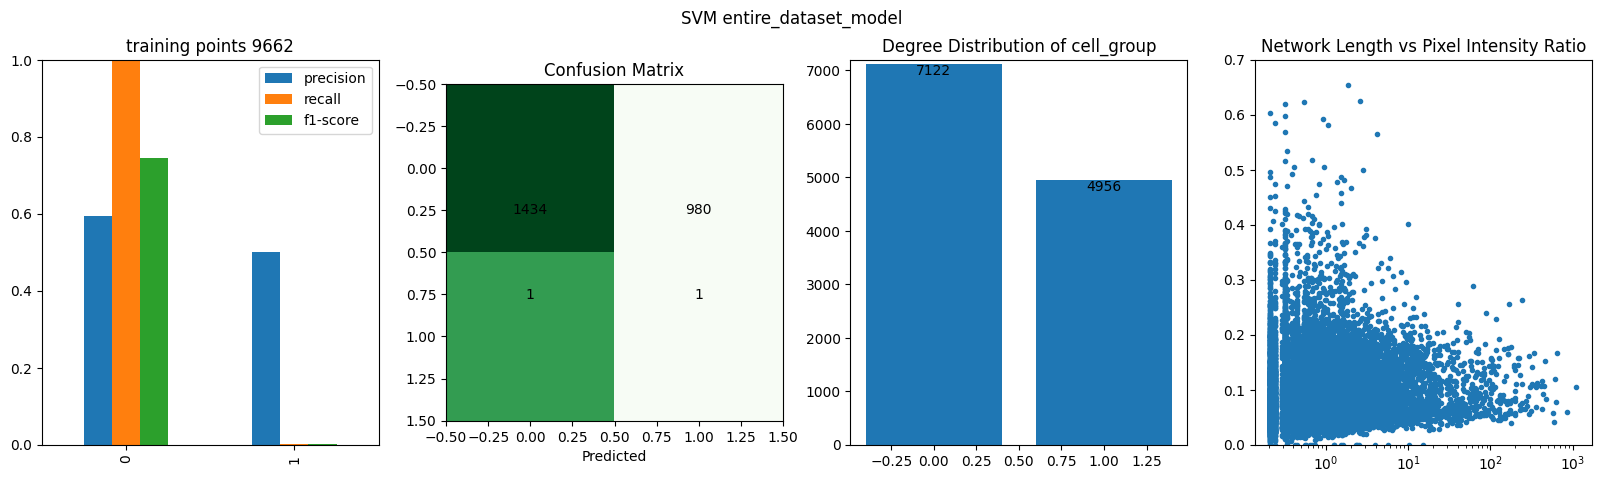

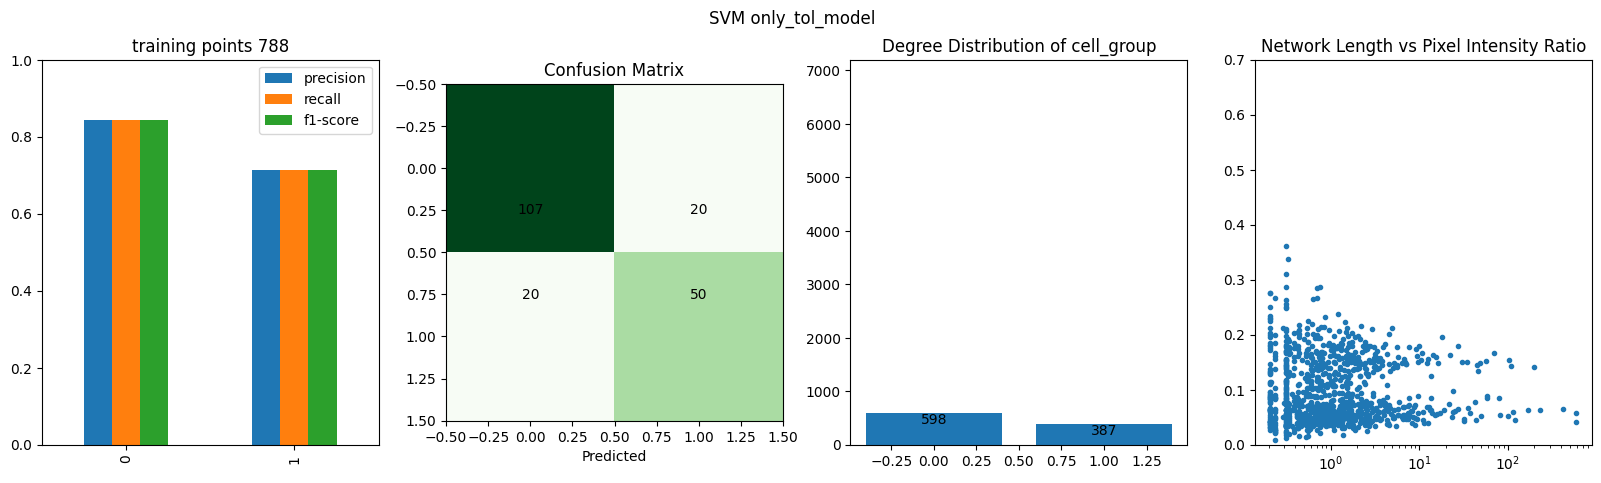

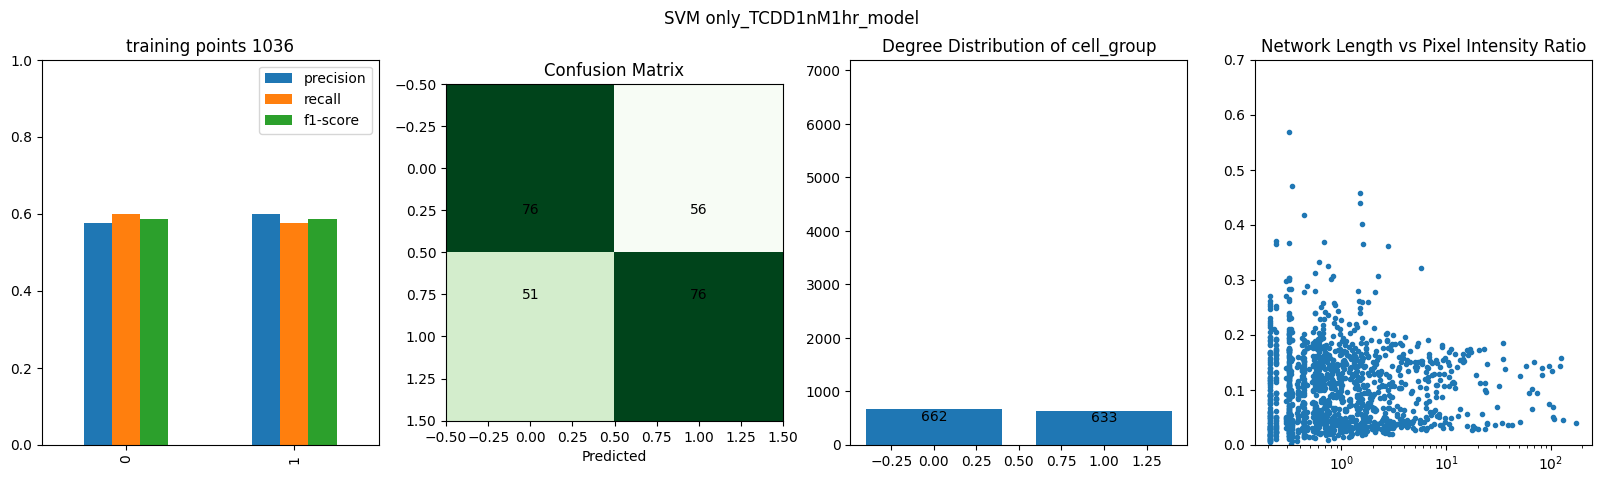

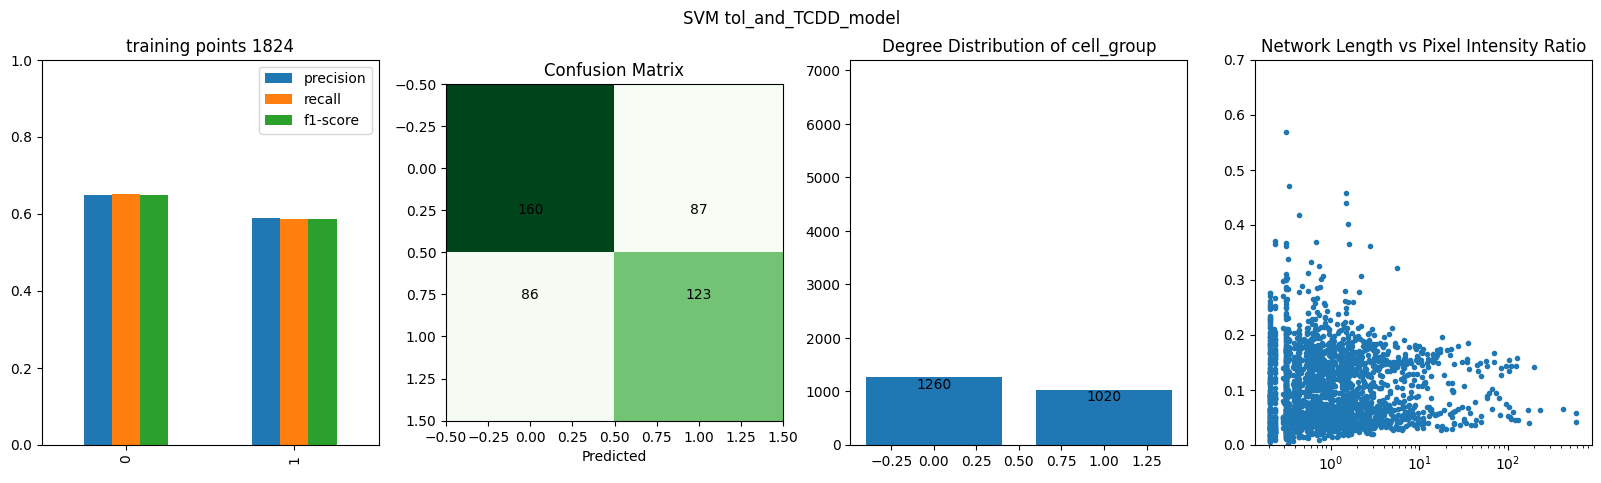

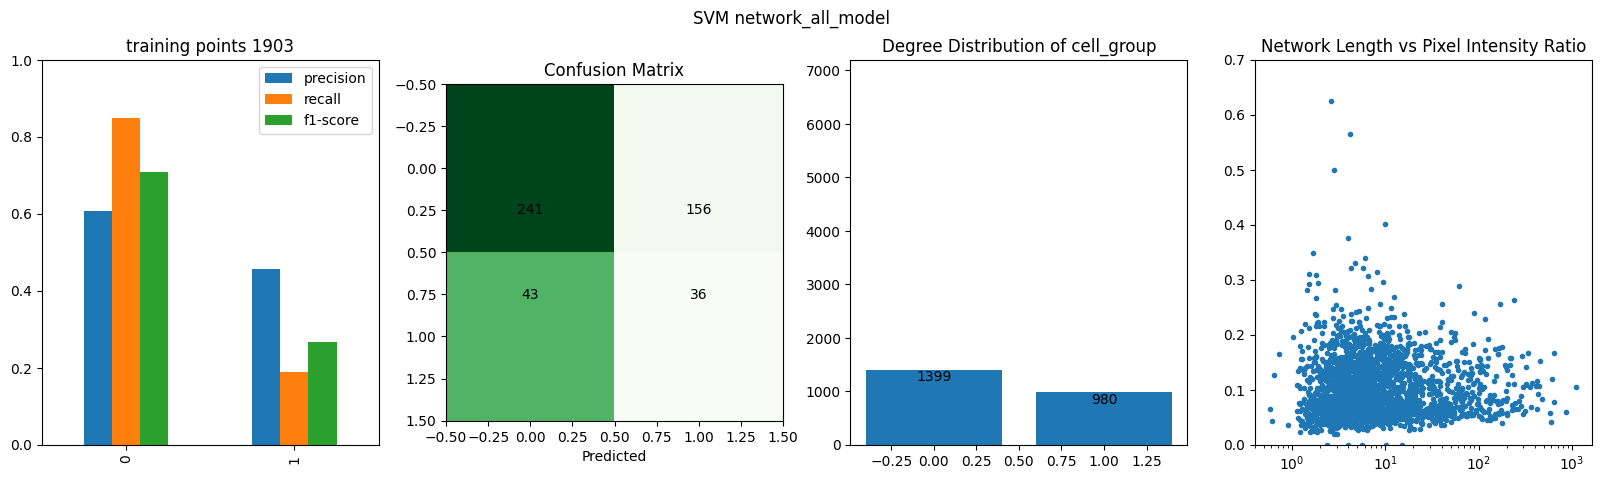

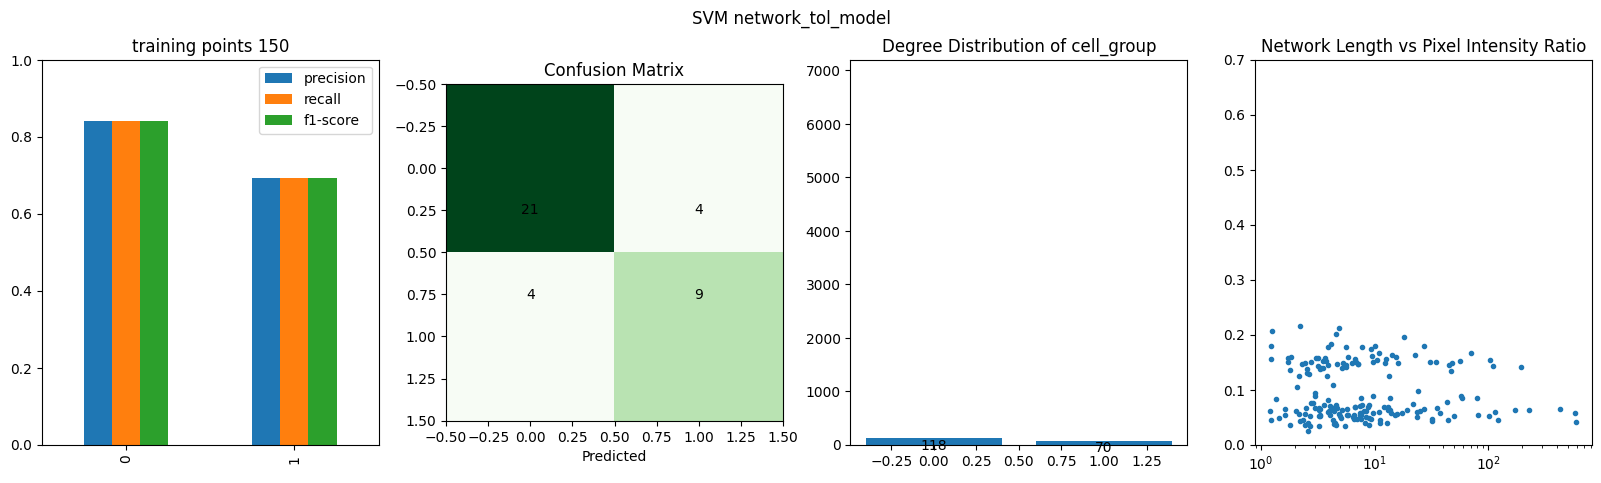

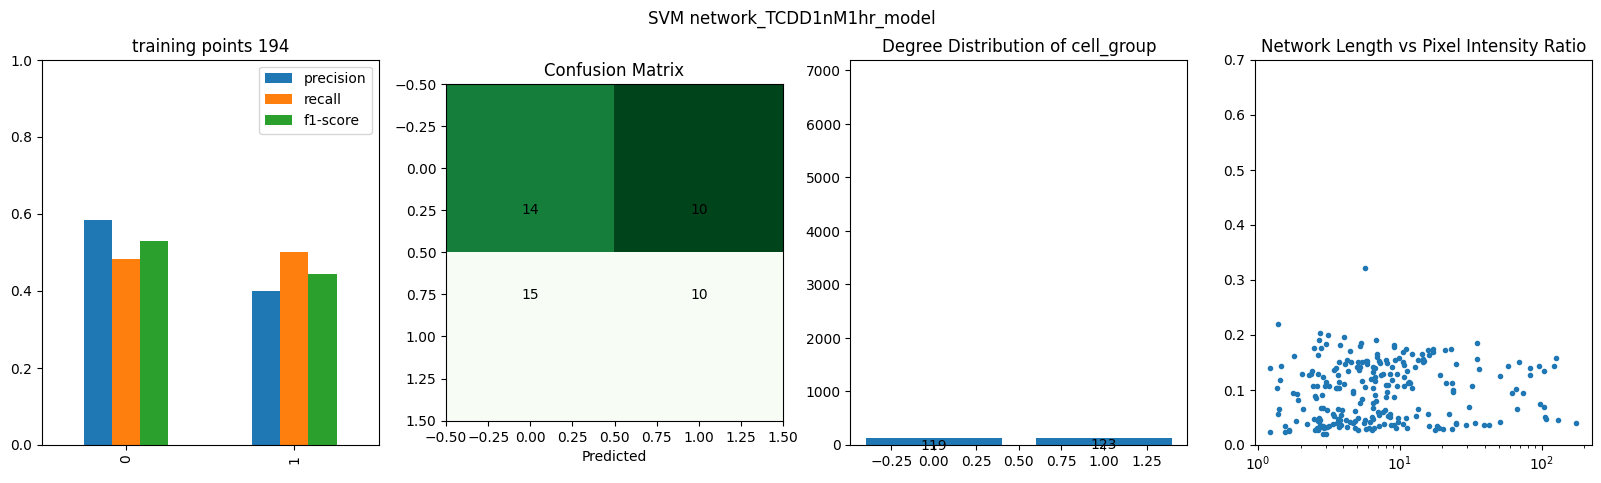

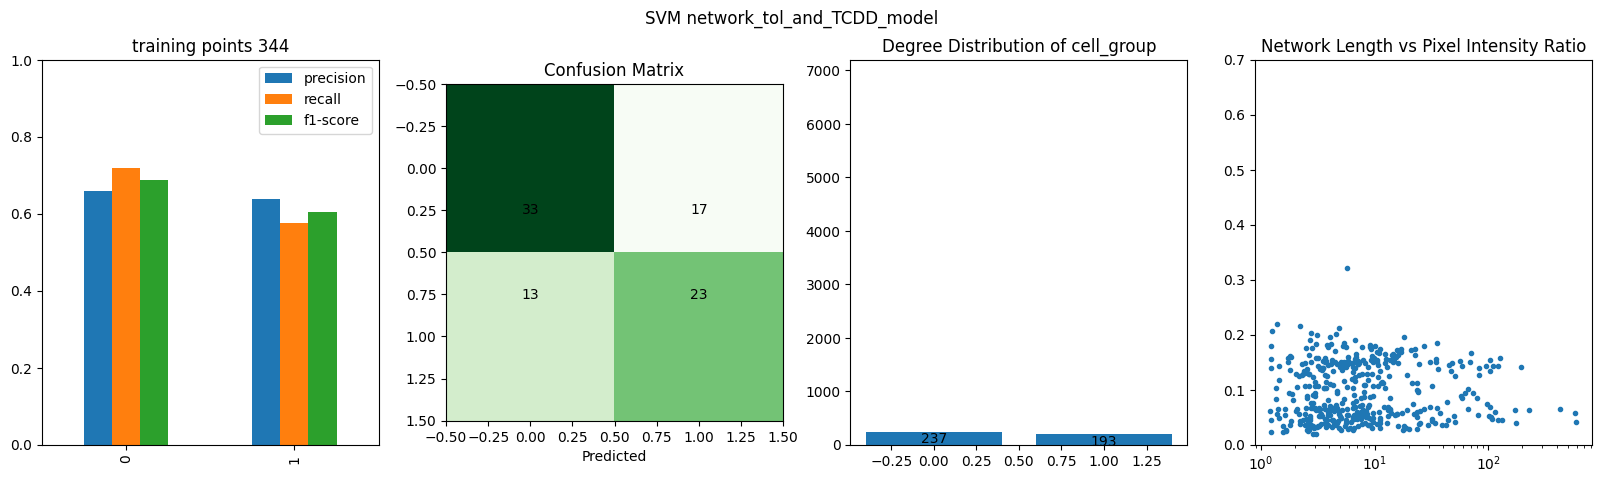

In [17]:
import matplotlib.pyplot as plt

def plot_classification_report_and_confusion_matrix(data, y_test, y_pred, pix_int, title):
    # create a 1x4 subplot
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    fig.suptitle(title)
    # draw a plot to show this for 0, 1
    report = classification_report(y_test, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df = df.drop('support', axis = 1)

    df.iloc[0:2].plot(kind='bar', ax=ax[0])
    # have a number on top of each of these 
    ax[0].set_title('training points {}'.format(round(len(data) * 0.8)))
    # add the confusion matrix to the plot
    conf_matrix = confusion_matrix(y_test, y_pred)
    ax[1].imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Greens)
    ax[1].text(0, 0.25, conf_matrix[0][0], ha='center', va='center')
    ax[1].text(0, 0.75, conf_matrix[0][1], ha='center', va='center')
    ax[1].text(1, 0.25, conf_matrix[1][0], ha='center', va='center')
    ax[1].text(1, 0.75, conf_matrix[1][1], ha='center', va='center')

    ax[1].set_xlabel('Predicted')
    ax[1].set_title('Confusion Matrix')

    # plot degree distribution of cell_group
    cell_group_counts = data['cell_group'].value_counts()
    ax[2].bar(cell_group_counts.index, cell_group_counts.values)
    ax[2].set_title('Degree Distribution of cell_group')
    # add the excat number of each cell group
    ax[2].set_ylim(0, cell_group_counts.max() + 10)
    ax[2].set_xticks = [0, 1]

    ax[2].text(0, cell_group_counts[0], cell_group_counts[0], ha='center', va='top')
    ax[2].text(1, cell_group_counts[1], cell_group_counts[1], ha='center', va='top')
    # put it just above the bar
    

    ax[3].scatter(data['cc_length_(um)'], pix_int, marker = '.')
    ax[3].set_title('Network Length vs Pixel Intensity Ratio')
    ax[3].set_xscale('log')
    ax[3].set_ylim(0, 0.7)

    # set ylim to all 
    ax[0].set_ylim(0, 1)
    ax[2].set_ylim(0, 7200)

# save the figure as a png
    plt.savefig(title + '.png')
    return fig
# returns model, dataframe, y_test, y_pred, pixel_intensity_ratio, length of train, length of test
# def plot_classification_report_and_confusion_matrix(data, y_test, y_pred, pix_int, title):

list_of_models = [entire_dataset_model, only_tol_model, only_TCDD1nM1hr_model, tol_and_TCDD_model, network_all_model, network_tol_model, network_TCDD1nM1hr_model, network_tol_and_TCDD_model]

# format it with the variable name 

for curr_model in list_of_models:
    entire = plot_classification_report_and_confusion_matrix(curr_model[1], curr_model[2], curr_model[3],  curr_model[4],  'SVM ' + (var_name(curr_model)[0]))


For 
Confusion Matrix:
[[23  2]
 [ 5  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.80      0.62      0.70        13

    accuracy                           0.82        38
   macro avg       0.81      0.77      0.78        38
weighted avg       0.81      0.82      0.81        38



(0.0, 1.0)

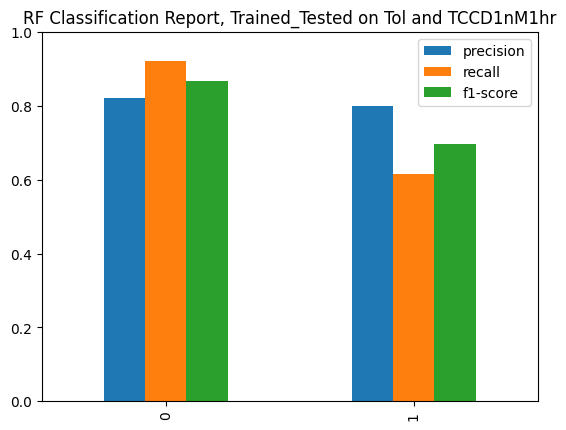

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed your data (steps 1 and 2)

def train_RF(data): 
# 3. Split the data into train and test sets
    data = data.drop('file_name', axis = 1)
    data = data.fillna(0)
    cleaned_df = pd.read_csv('full_Table_HIGH_QUAL.csv')

    # remove the inf and replace with 0 
    data = data.replace([np.inf, -np.inf], 0)
    pix_int = data['cc_pixel_intensity_ratio']

    for x in data.columns: 
        if x not in cleaned_df.columns: 
            print(x)
            data = data.drop(x, axis = 1)
    # replace nan with 0 
    # just drop the rows with nan
    # 2. Data Preprocessing
    # Assuming 'cell_group' is your target column
    X = data.drop('cell_group', axis=1)  # Features
    y = data['cell_group']  # Target variable


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Train the Random Forest Model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
    rf_model.fit(X_train, y_train)

    # 5. Evaluate the model
    y_pred = rf_model.predict(X_test)
    return [rf_model, data, y_test, y_pred, pix_int, len(X_train), len(X_test)]




for curr_model in list_of_models:
    entire = plot_classification_report_and_confusion_matrix(curr_model[1], curr_model[2], curr_model[3],  curr_model[4],  'RF ' + (var_name(curr_model)[0]))


In [ ]:
def prep_for_test(data): 
    data = data.drop('file_name', axis = 1)
    new_y_real = data['cell_group']
    data = data.drop('cell_group', axis=1)
    data = data.fillna(0)
#   drop values that are infinite 
    data = data.replace([np.inf, -np.inf], 0)
    return data, new_y_real


new_X_test = pd.read_csv('All_Groups.csv')
new_X_test, new_y = prep_for_test(new_X_test)
new_X_test = new_X_test[X_test.columns] # making the order the same



Confusion Matrix:
[[7122    0]
 [4956    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74      7122
           1       0.00      0.00      0.00      4956

    accuracy                           0.59     12078
   macro avg       0.29      0.50      0.37     12078
weighted avg       0.35      0.59      0.44     12078



/home/mitosim2/miniconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/mitosim2/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mitosim2/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mitosim2/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

Text(0.5, 1.0, 'SVM Classification Report, Trained on Tol + TCDD, Tested on All')

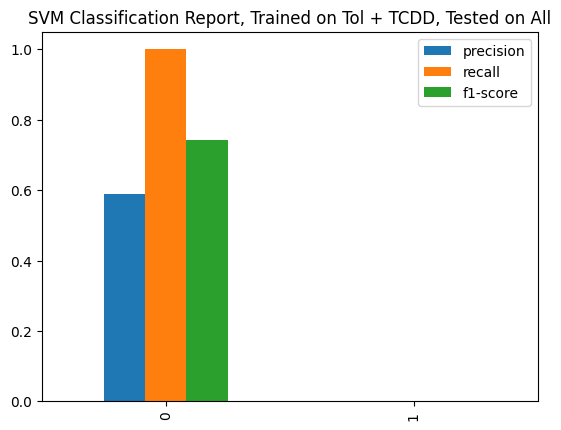

In [ ]:
# see how accurate new_pred and new_y are 
# filli n the Nan with 0s
new_pred = svm_model.predict(new_X_test)
print("Confusion Matrix:")
print(confusion_matrix(new_y, new_pred))

print("\nClassification Report:")
print(classification_report(new_y, new_pred))


# store the classification report and turn into barchart
report = classification_report(new_y, new_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
# draw a plot to show this
df = df.drop('support', axis = 1)
# draw a plot to show this for 0, 1 a
df.iloc[0:2].plot(kind='bar')
plt.title('SVM Classification Report, Trained on Tol + TCDD, Tested on All')

Confusion Matrix:
[[4506 2616]
 [2815 2141]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.63      0.62      7122
           1       0.45      0.43      0.44      4956

    accuracy                           0.55     12078
   macro avg       0.53      0.53      0.53     12078
weighted avg       0.55      0.55      0.55     12078



Text(0.5, 1.0, 'RF Classification Report, Trained on Tol + TCDD, Tested on All')

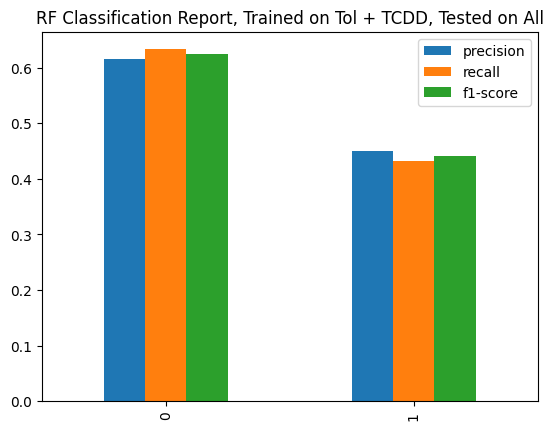

In [ ]:
# see how accurate new_pred and new_y are 
new_pred = rf_model.predict(new_X_test)

print("Confusion Matrix:")
print(confusion_matrix(new_y, new_pred))

print("\nClassification Report:")
print(classification_report(new_y, new_pred))


# store the classification report and turn into barchart
report = classification_report(new_y, new_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
# draw a plot to show this
df = df.drop('support', axis = 1)
# draw a plot to show this for 0, 1 a
df.iloc[0:2].plot(kind='bar')
plt.title('RF Classification Report, Trained on Tol + TCDD, Tested on All')